In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Reading our dataset and dropping junk columns

In [2]:
df = pd.read_csv("data.csv")
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split the features data and the target 

In [3]:
# We will tyake only these columns for training
cols = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']

X = df[cols]
y = df['diagnosis']

# Encoding the target value 
y = np.asarray([1 if c == 'M' else 0 for c in y])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(398, 5), y:(398,)
Shape test set: X:(171, 5), y:(171,)


### Training Random Forest

In [5]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy : 94.73684210526315


### Checking Feature Importances

In [6]:
f_importance = pd.DataFrame(rfc.feature_importances_*100,index=cols,columns=['Importance'])
f_importance.sort_values(by='Importance',ascending=False,inplace=True)
f_importance

,Importance
concave points_mean,35.096714
concavity_mean,26.245003
area_mean,15.312712
perimeter_mean,12.229979
radius_mean,11.115592


In [7]:
clf_report = classification_report(y_test, y_pred)
print('Classification report')
print(clf_report)

Classification report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       114
           1       0.90      0.95      0.92        57

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



[[108   6]
 [  3  54]]


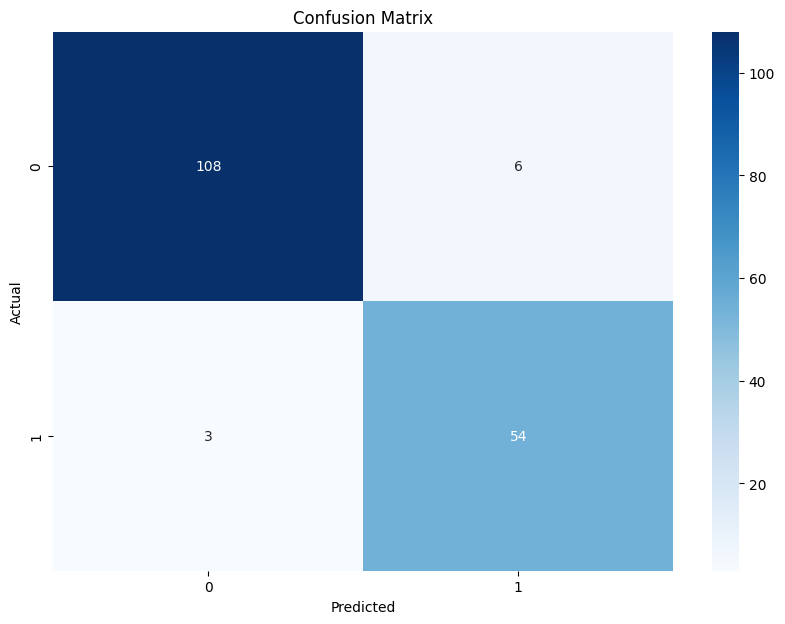

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Saving the model

In [10]:
joblib.dump(rfc,"../models/cancer_model.pkl")

['../models/cancer_model.pkl']